# Penguins Analysis

I'm interested in how bill length differs between the three species of penguin (Adelie, Chinstrap and Gentoo) in the Palmer Archipelago (Antarctica) penguin dataset.

Data was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Kaggle link: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

## Setup

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in the Palmer penguins data
penguins = sns.load_dataset("penguins")

In [ ]:
penguins = penguins.loc[:, ["species","bill_length_mm"]]
penguins

## Exploratory analysis

### Density plot

Text(0.5, 9.444444444444438, 'Bill length (mm)')

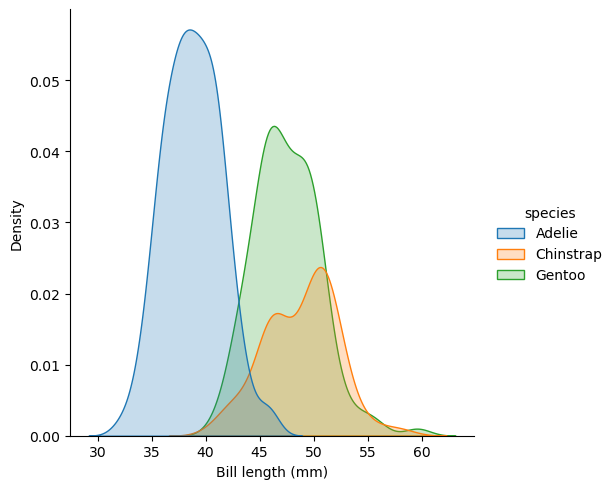

In [21]:
sns.displot(penguins, x = "bill_length_mm", kind = "kde",\
            hue = "species", fill = True, legend = True)
plt.xlabel("Bill length (mm)")
# plt.legend(title = "Species", loc = "upper right",
#         labels = ["Gentoo", "Chinstrap", "Adelie"])  


## Boxplot

Text(0.5, 0, 'Bill length (mm)')

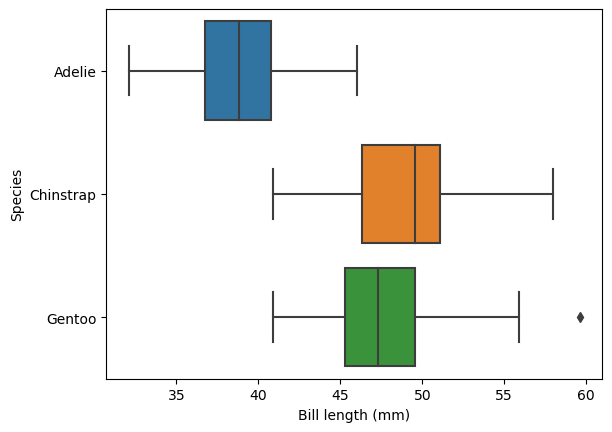

In [4]:
sns.boxplot(penguins, x = "bill_length_mm", y = "species")
plt.ylabel("Species")
plt.xlabel("Bill length (mm)")

### Interpretation

From the plots above, we can see that Chinstrap penguins tend to have slightly higher bill lengths than Gentoo penguins, although there is definite overlap in the bill lengths of the two species. Adelie penguins tend to have the shortest bill lengths out of the three species of penguin, with a median bill length much lower than the other two.

In terms of the distribution of the data, the Adelie distribution appears fairly normal, whereas the Chinstrap distribution seems to be slightly left-skewed and the Gentoo slightly right-skewed. There is also an outlier present in the Gentoo dataset (according to the 1.5 IQR rule).

## Summary statistics

Below I examine the measures of centrality, spread and skewness for bill length for each species.

In [5]:
penguins_aggregated = penguins.groupby("species").agg(["mean", "median", "std", "skew"])

penguins_aggregated

bill_length_mm                           
                    mean median       std      skew
species                                            
Adelie         38.791391  38.80  2.663405  0.161674
Chinstrap      48.833824  49.55  3.339256 -0.090575
Gentoo         47.504878  47.30  3.081857  0.651131

Penguins of the Adelie species have the lowest mean (**38.79**) and median (**38.80**) bill lengths, as well as the lowest variability (**SD: 2.66**). Furthermore, the distribution is fairly symmetrical with a skewness value of **0.16**.

The mean and median bill lengths of the Chinstrap species are **48.83** and **49.55** respectively, which are both higher than the mean/median bill lengths for the two other species. The species also has the highest standard deviation (**3.34**). The distribution is symmetrical (**-0.09**).

Gentoo penguins in this dataset have a mean bill length of **47.50** and a median bill length of **47.30**, with a standard deviation of **3.08**. The data for Gentoo penguins is slightly right-skewed (skewness score of **0.65**) as indicated by the visualisations above.

Overall, the summary statistics further indicate that Chinstrap penguins have the longest bills, and Adelie have the shortest.

## Hypothesis test & probability

Below a perform a hypothesis test to check whether the mean bill length of Gentoo is significantly longer than the mean bill length of Adelie.


H0 : mean gentoo bill length - mean adelie bill length = 0

Ha : mean gentoo bill length - mean adelie bill length > 0

alpha = 0.05

### Calculate test statistic

In [6]:
penguins_aggregated

bill_length_mm                           
                    mean median       std      skew
species                                            
Adelie         38.791391  38.80  2.663405  0.161674
Chinstrap      48.833824  49.55  3.339256 -0.090575
Gentoo         47.504878  47.30  3.081857  0.651131

In [7]:
# Gentoo mean bill length
gentoo_mean = penguins_aggregated.loc["Gentoo", ("bill_length_mm", "mean")]

# Adelie mean bill length
adelie_mean = penguins_aggregated.loc["Adelie", ("bill_length_mm", "mean")]

diff_obs = gentoo_mean - adelie_mean
diff_obs

8.71348732030367

### Create and visualise null distribution

The null hypothesis assumes that the mean bill lengths of Gentoos and Adelies are the same. To create a null distribution from this the observed distribution of Adelie and Gentoo records is resampled 10,000 times, with the species reallocated to the observed bill length at random.



In [8]:
def diff_between_species_permute(data):  
    # shuffle species labels
    data["species"] = data["species"].sample(frac = 1).values
    # group by species and calculate mean bill length
    agg_data = data.groupby("species").agg("mean")
    
    # Gentoo mean bill length
    gentoo_mean = agg_data.loc["Gentoo", :] 
    
    # Adelie mean bill length
    adelie_mean = agg_data.loc["Adelie", :]  

    return(gentoo_mean - adelie_mean)

In [9]:
def draw_permute_reps(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    perm_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        perm_replicates[i] = func(data)

    return perm_replicates

In [10]:
permuted_replicates = draw_permute_reps(penguins, diff_between_species_permute, size = 10000)
permuted_reps_df = pd.DataFrame({"replicate": pd.Series(range(1,10001)),
    "rep_diff": permuted_replicates})

Visualise this:

Text(5.4, 450, 'Observed stat')

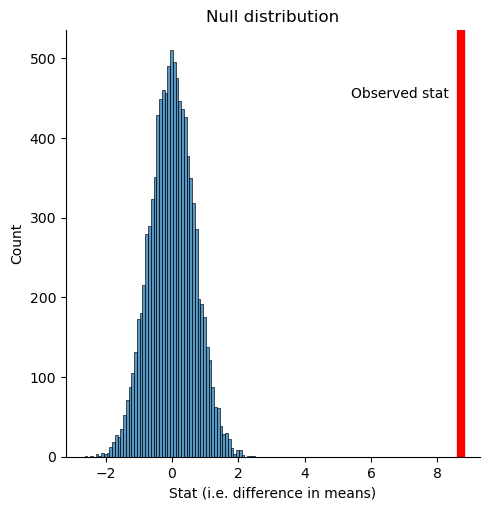

In [11]:
sns.displot(permuted_reps_df, x = "rep_diff", fill = True)
plt.xlabel("Stat (i.e. difference in means)")
plt.title("Null distribution")
plt.axvline(x = diff_obs, color = "red", linewidth = 6)
plt.text(5.4, 450, "Observed stat")

Based on this visualisation we can see that the observed difference between species is well beyond the values of the null distribution.

If the probability of getting the observed statistic from the null distribution (the p-value) is less than the significance level then we conclude that it is unlikely that the null hypothesis holds. Alternatively, if the p-value is higher than the significance level then we will fail to reject the null hypothesis as observing our statistic would be likely under the null hypothesis.



### Compute p-value

In [12]:
diff_obs

8.71348732030367

In [13]:
p_value = np.sum(permuted_replicates >= diff_obs) / 10000
p_value

0.0

p is so small it is reported as 0 by Python. p cannot be 0 itself so I'll report it as p < 0.001.

The plot shows that the observed statistic (the red line) is very far from the centre of the null distribution, therefore it would be very unlikely to observe a statistic at least as extreme if the null hypothesis was true.

In fact, the p-value is well below my significance level of 0.05. Hence, we can reject the null hypothesis that the mean bill length of Gentoo penguins is the same or shorter than that of Adelie penguins in favour of the alternative hypothesis.



## Correlation matrix

Here I examine how each numeric variable associated with the penguin species correlates with each other, using a correlation matrix.

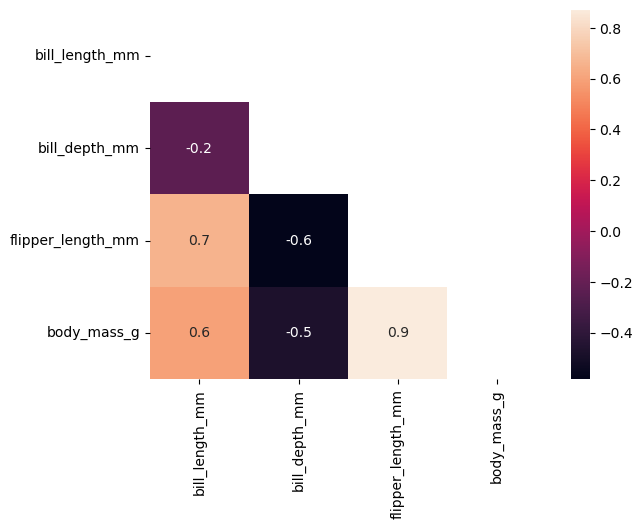

In [14]:
penguins = sns.load_dataset("penguins") # revert back to whole data
corr_matrix = penguins.select_dtypes(np.number).corr()

# create a mask so that upper triangle gets masked and hidden
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

sns.heatmap(corr_matrix, annot=True, mask = mask, fmt = ".1f")
plt.show()

The correlation matrix above shows there is a very strong positive correlation between body mass and flipper length (**r = 0.9**) across the penguin species. Furthermore, there is also a strong positive correlation between flipper length and bill length (**r = 0.7**), as well as between body mass and bill length (**r = 0.6**). There is a strong negative correlation between bill depth and flipper length (**r = -0.6**), as well as a moderate negative correlation between body mass and bill depth (**r = -0.5**). Furthermore, there is a weak correlation between bill length and bill depth (**r = -0.2**)

In sum, bill depth has a moderate/strong negative association with flipper length and body mass, and a weak negative association with bill length, whereas flipper length, body mass, and bill length are all positively associated with each other. This suggests that as penguins body mass increases, their flipper and bill lengths increase whereas the bill depth decreases.